In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


1. Data division

In [26]:
import sys
sys.path.append('e:/hcmus/5th-semester/pattern-recognition/prml-lab/PRML-Lab01-classification-with-machine-learning/utils')

import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print(f'Train set shape: {X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}')

Train set shape: (48000, 784), Train labels shape: (48000,)
Validation set shape: (12000, 784), Validation labels shape: (12000,)


2. Initialize and train the model

In [28]:
model = LogisticRegression(max_iter = 1000, solver = 'lbfgs', multi_class = 'multinomial')

model.fit(X_train, y_train)

e:\hcmus\5th-semester\pattern-recognition\prml-lab\PRML-Lab01-classification-with-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
e:\hcmus\5th-semester\pattern-recognition\prml-lab\PRML-Lab01-classification-with-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

3. intialize and train model

In [30]:
# Predict
y_pred = model.predict(X_val)

# Calculate
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1202
           1       0.95      0.96      0.96      1219
           2       0.75      0.74      0.75      1205
           3       0.84      0.86      0.85      1184
           4       0.73      0.78      0.76      1202
           5       0.93      0.91      0.92      1211
           6       0.65      0.56      0.60      1218
           7       0.90      0.92      0.91      1159
           8       0.93      0.92      0.92      1197
           9       0.92      0.94      0.93      1203

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



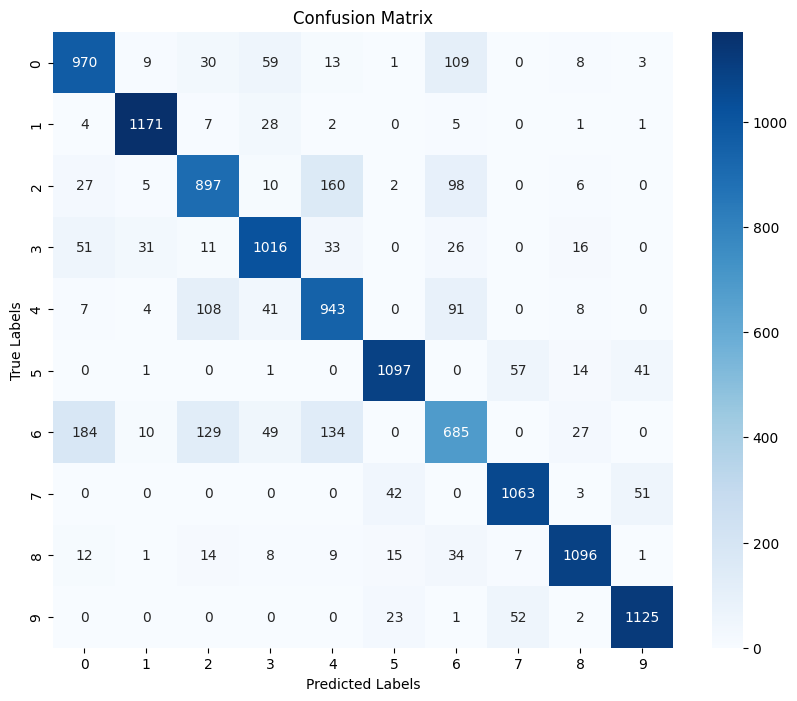

In [34]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [35]:
y_test_pred = model.predict(X_test)
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred))



Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1000
           1       0.95      0.95      0.95      1000
           2       0.73      0.73      0.73      1000
           3       0.82      0.84      0.83      1000
           4       0.71      0.76      0.73      1000
           5       0.93      0.89      0.91      1000
           6       0.62      0.55      0.58      1000
           7       0.90      0.93      0.92      1000
           8       0.91      0.92      0.92      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

